# Лабораторная работа № 3

## Морозова Маргарита, РИ-481223

### Номер студенческого: 09802402

In [93]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
%matplotlib inline

In [103]:
table = pd.read_excel(r'C:\Users\Morozova Margarita\for_lab3.xlsx')
variant = 2 # номер варианта
Y = np.array(table.values[variant-1][1:])
print(Y)

[23.46 14.86 20.14 21.59 18.98 21.77 20.27 16.86 16.23 18.55 14.87 11.98
 14.41 13.42 10.44  8.26  8.86  9.53  6.88  4.1   7.61  4.92  1.79  0.1 ]


In [104]:
t = np.linspace(0, 1, num = 24)

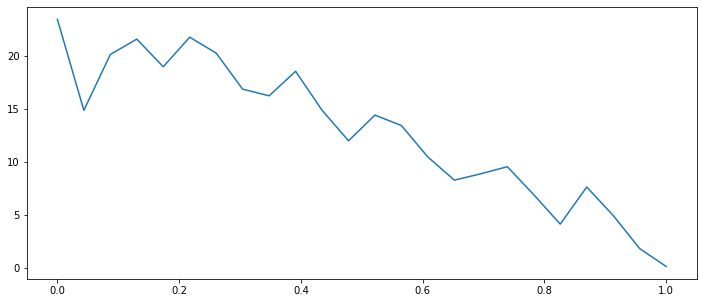

In [96]:
plt.figure(figsize= (12, 5)) 
plt.plot(t, Y)

### Тренд первого порядка

In [97]:
X = np.hstack((np.ones(24).reshape(24, 1), t.reshape(24, 1)))
Y = Y.reshape(24, 1)
B = np.linalg.lstsq(X,Y, rcond=None)

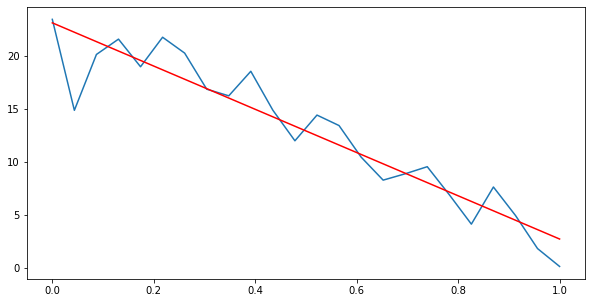

In [98]:
B= B[0]#забираем из результата коэффициенты βprint(B)
plt.figure(figsize = (10, 5))
plt.plot(t, Y) # строимисходныйВР
plt.plot(t, B[0] + B[1] * t, 'r')# строим его тренд
plt.show()

Используем функцию на основе полиномиальных кривых из numpy:

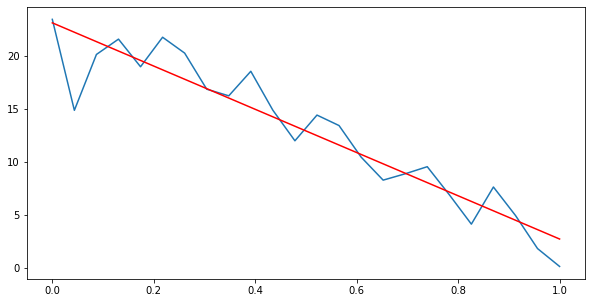

In [99]:
bb= np.polyfit(t, Y, 1)#полиномиальная кривая 1-го порядка
plt.figure(figsize = (10, 5))
plt.plot(t, Y)
plt.plot(t, bb[1] + bb[0]*t, 'r')# Внимание! Коэф. βв другом порядке
plt.show()

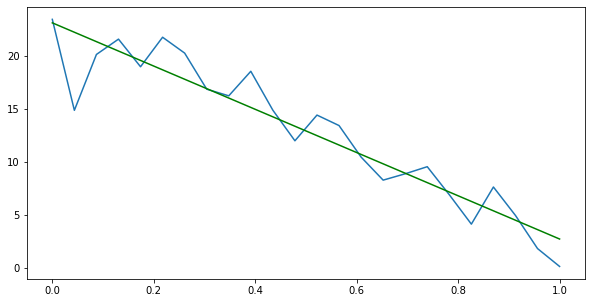

In [100]:
p= np.poly1d(bb.reshape(2))#создаем экземпляр полинома
plt.figure(figsize = (10, 5))
plt.plot(t, Y)# считаем значения полинома на заданной временной сетке
plt.plot(t, p(t), 'g')
plt.show()

Результаты слвпадают с результатами, полученными с помощью матричных расчетов.

Воспользуемся линейной регрессией из scipy.stats:

LinregressResult(slope=-20.437600000000003, intercept=23.13046666666667, rvalue=-0.9402558063448317, pvalue=9.034559588896637e-12, stderr=1.5777924678217814, intercept_stderr=0.9207871804076035)


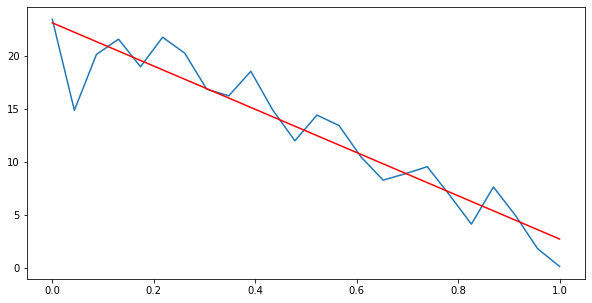

In [101]:
out = stats.linregress(t, Y.reshape(24))
print(out) # выведетвсе коэффициенты и статистику регрессии
plt.figure(figsize= (10, 5))
plt.plot(t, Y)# строим график кривой вместе с трендом
plt.plot(t, out.intercept + out.slope*t, 'r')
plt.show()

На основе подгонки кривых curve_fitиз scipy.optimize:

In [105]:
def func(t, b0, b1): # описываем функцию тренда
  return b0 + b1 * t # линейный тренд с 2 параметрами
from scipy.optimize import curve_fit

popt, pcov = curve_fit(func, t, Y) # проводим подгонку МНК
print(popt) # получаем коэффициенты b0 & b1
print(pcov) # ковариационная матрица ошибок подгонки

[ 23.13046667 -20.4376    ]
[[ 0.84784904 -1.24471454]
 [-1.24471454  2.48942907]]


На основе библиотеки sklearn:

In [106]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(t.reshape(-1,1), Y)
print(reg.coef_)# здесьвыведется линейный коэффициент b1
print(reg.intercept_)# здесьвыведется коэффициент b0(смещение)
print(reg.score(t.reshape(-1,1), Y))

[-20.4376]
23.130466666666667
0.8840809813651695


Последнее значение - это «оценка» (равная R^2) полученной регрессии, чем ближе она к 1.0, тем лучше тренд

На основе statsmodel:

In [107]:
import statsmodels.api as sm
x_ = sm.add_constant(t.reshape(-1,1))   
smm= sm.OLS(Y, x_)#используемМетодНаименьшихКвадратов#(МНК) (Ordinary Least Squares = OLS)
res= smm.fit()# подгоняемпараметры модели по МНК
print(res.params)# получаем результирующие коэффициенты

[ 23.13046667 -20.4376    ]


Коэффициенты совпали с предыдущими поученными значениями.

### Тренд второй степени

C:\Users\9265~1\AppData\Local\Temp/ipykernel_15068/2549049549.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  B = np.linalg.lstsq(X2, Y)


[[ 21.12441538]
 [ -7.85418741]
 [-12.58341259]]
[ 21.12441541  -7.85418755 -12.58341248]
[[  1.43095336  -5.59780669   4.565587  ]
 [ -5.59780669  30.70312161 -28.63868222]
 [  4.565587   -28.63868222  28.63868217]]


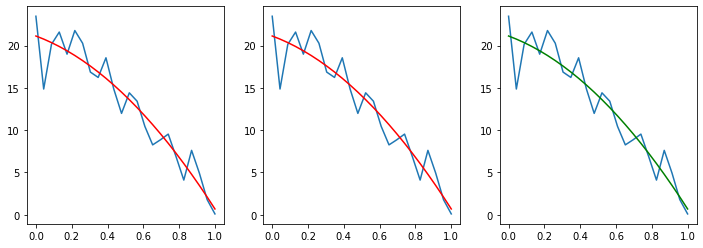

In [108]:
X2 = np.hstack((X, np.power(t, 2).reshape(24, 1)))
Y = Y.reshape(24, 1)
B = np.linalg.lstsq(X2, Y)

plt.figure(figsize=(12, 4))

plt.subplot(131)
B = B[0] # забираем из результата коэффициенты β
print(B)
plt.plot(t, Y) # строим исходный ВР
plt.plot(t, B[0] + B[1] * t + B[2] * t ** 2, 'r') # строим его тренд

plt.subplot(132)
bb = np.polyfit(t, Y, 2) # полиномиальная кривая 2-го порядка
plt.plot(t, Y)
plt.plot(t, bb[2] + bb[1] * t + bb[0] * t ** 2, 'r') # Внимание! Коэф. β в другом порядке

plt.subplot(133)
p = np.poly1d(bb.reshape(3)) # создаем экземпляр полинома
plt.plot(t, Y)
# считаем значения полинома на заданной временной сетке
plt.plot(t, p(t), 'g')

def func_2(t, b0, b1, b2): # описываем функцию тренда
    return b0 + b1 * t + b2 * t ** 2 

Y = Y.reshape(24)
popt_2, pcov_2 = curve_fit(func_2, t, Y) # проводим подгонку МНК
print(popt_2) # получаем коэффициенты b0 & b1
print(pcov_2) # ковариационная матрица ошибок подгонки

Графики и значения коэффициентов совпадают.

### Тренд третьей степени

C:\Users\9265~1\AppData\Local\Temp/ipykernel_15068/1701757866.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  B = np.linalg.lstsq(X3, Y)


[[ 20.36501709]
 [  2.35988397]
 [-38.66923699]
 [ 17.3905496 ]]


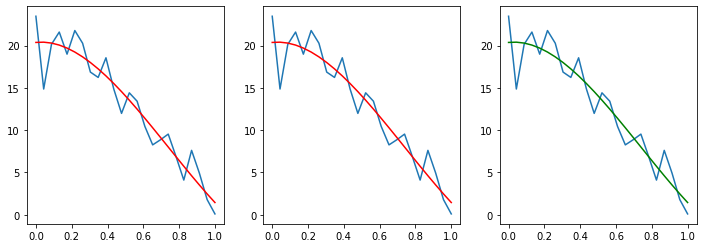

[ 20.36501708   2.3598843  -38.66923799  17.39055033]
[[   2.25377814  -16.47910582   32.222937    -18.39678375]
 [ -16.47910582  176.45172655 -400.18974204  247.44070614]
 [  32.222937   -400.18974204  976.94080271 -631.94141655]
 [ -18.39678375  247.44070614 -631.94141655  421.29428082]]


In [109]:
X3 = np.hstack((X2, np.power(t, 3).reshape(24, 1)))
Y = Y.reshape(24, 1)
B = np.linalg.lstsq(X3, Y)

plt.figure(figsize=(12, 4))

plt.subplot(131)
B = B[0] # забираем из результата коэффициенты β
print(B)
plt.plot(t, Y) # строим исходный ВР
plt.plot(t, B[0] + B[1] * t + B[2] * t ** 2 + B[3] * t ** 3, 'r') # строим его тренд

plt.subplot(132)
bb = np.polyfit(t, Y, 3) # полиномиальная кривая 3-го порядка
plt.plot(t, Y)
plt.plot(t, bb[3] + bb[2] * t + bb[1] * t ** 2 + bb[0] * t ** 3, 'r') # Внимание! Коэф. β в другом порядке

plt.subplot(133)
p = np.poly1d(bb.reshape(4)) # создаем экземпляр полинома
plt.plot(t, Y)
# считаем значения полинома на заданной временной сетке
plt.plot(t, p(t), 'g')
plt.show()


def func_3(t, b0, b1, b2, b3): # описываем функцию тренда
    return b0 + b1 * t + b2 * t ** 2 + b3 * t ** 3

Y = Y.reshape(24)
popt_3, pcov_3 = curve_fit(func_3, t, Y) # проводим подгонку МНК
print(popt_3) # получаем коэффициенты b0 & b1
print(pcov_3) # ковариационная матрица ошибок подгонки

Графики и значения коэффициентов совпадают.

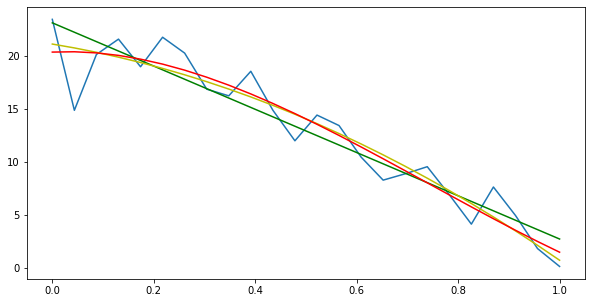

In [114]:
plt.figure(figsize = (10, 5)) 
plt.plot(t, Y)     # строим исходный ВР 
plt.plot(t, func(t, popt[0], popt[1]), 'g')
plt.plot(t, func_2(t, popt_2[0], popt_2[1], popt_2[2]), 'y')
plt.plot(t, func_3(t, popt_3[0], popt_3[1], popt_3[2], popt_3[3]), 'r')
plt.show() 

### Тренд методом сглаживания (3, 7, 11 точек)

In [115]:
def smooth(x, window_len):
  if window_len < 3:
    return x
  s=np.r_[2*x[0]-x[window_len-1::-1], x, 2*x[-1]-x[-1:-window_len:-1]]
  w=np.ones(window_len, 'd')
  y=np.convolve(w/w.sum(), s, mode='same')
  return y[window_len:-window_len+1]

In [116]:
Smoothed_data = smooth(Y, 3)

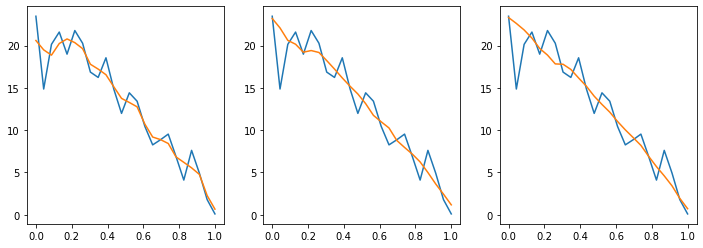

In [120]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(t, Y) 
plt.plot(t, Smoothed_data)

plt.subplot(132)
plt.plot(t, Y) 
plt.plot(t, smooth(Y, 7))

plt.subplot(133)
plt.plot(t, Y) 
plt.plot(t, smooth(Y, 11))

### Собственная функция методом сглаживания

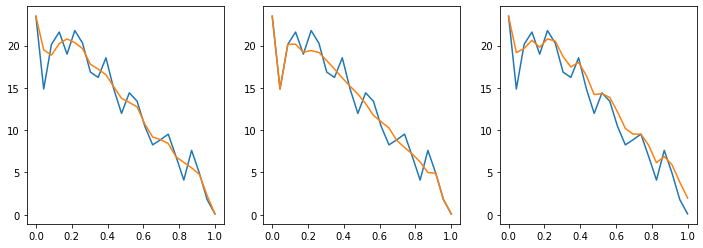

In [127]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
def smooth (x):
    tau=[]
    tau.append(x[0])
    for i in range (1, len(x) - 1):
        tau.append((x[i - 1] + x[i] + x[i + 1]) / 3)
    tau.append(x[len(x) - 1])
    return tau
plt.plot(t, Y) 
plt.plot(t, smooth(Y)) 

plt.subplot(132)
def smooth (x):
    tau=[]
    tau.append(x[0])
    tau.append(x[1])
    tau.append(x[2])
    for i in range (3, len(x) - 3):
        tau.append((x[i - 3] + x[i - 2] + x[i - 1] + x[i] + x[i + 1] + x[i + 2] + x[i + 3]) / 7)
    tau.append(x[len(x) - 3])
    tau.append(x[len(x) - 2])
    tau.append(x[len(x) - 1])
    return tau

plt.plot(t, Y) 
plt.plot(t, smooth(Y))

plt.subplot(133)
def smooth_exp (x, alpha):
    tau=[]
    tau.append(x[0])
    for i in range (1, len(x)) :
        tau.append ((1 - alpha) * tau[i-1] + alpha * x[i])
    return tau

plt.plot(t, Y) 
plt.plot(t, smooth_exp(Y, 0.5))